# Examples for pyoculus
## 1. Import oculus and the solvers

In [1]:
import pyoculus as oculus
from pyoculus.solvers import PoincarePlot
from pyoculus.solvers import FixedPoint
from pyoculus.solvers import LyapunovExponent
from pyoculus.solvers import FluxSurface

import numpy as np

## 2. Set up the problem we want to compute.
This can be a SPEC equilibrium or anything. Here as an example, we use the perturbed slab model Stuart uses for his "Destruction" paper

In [2]:
ps = oculus.problems.PerturbedSlab(k=0.0018)

## 3. Poincare Plot

CPU times: user 6.32 s, sys: 114 ms, total: 6.44 s
Wall time: 6.38 s


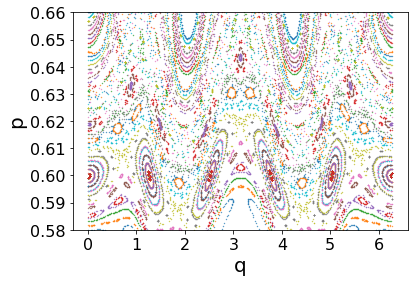

In [3]:
%%time
# set up the integrator
iparams = dict()
iparams['rtol'] = 1e-9

# set up the Poincare plot
pparams = dict()
pparams['Nfp'] = 1
pparams['sbegin'] = 0.58
pparams['send'] = 0.66
pparams['nPtrj'] = 50
pparams['nPpts'] = 500
pparams['zeta'] =0.0

pplot = PoincarePlot(ps,pparams,integrator_params=iparams)
pdata=pplot.compute()
pplot.plot(ylim=[0.58,0.66],s=0.5)

## 4. Finding fixed points and plot them

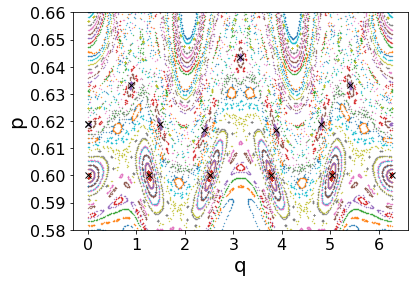

In [4]:
# set up the integrator
iparams = dict()
iparams['rtol'] = 1e-10

pparams = dict()
pparams['Nfp'] = 1
pparams['theta'] = 0

fp58 = FixedPoint(ps,pparams,integrator_params=iparams)
fp35 = FixedPoint(ps,pparams,integrator_params=iparams)

result58=fp58.compute(guess=[5/8,0],pp=5,qq=8,sbegin=0.5,send=0.7)
result35=fp35.compute(guess=[3/5,0],pp=3,qq=5,sbegin=0.5,send=0.7)

pplot.plot(ylim=[0.58,0.66],s=0.5)
result23=fp23.compute(guess=[2/3,0],pp=10,qq=15,sbegin=0.5,send=0.7)

pplot.plot(ylim=[0.58,0.680],s=0.5)
fp35.plot()
fp35.compute_eig()
fp58.plot()
fp58.compute_eig()

## 5. Greene's Residue and finding flux surfaces

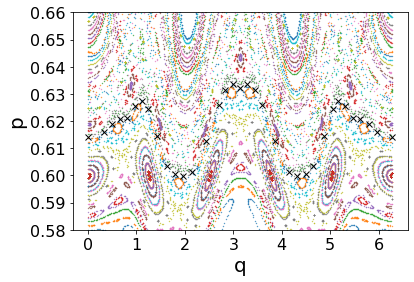

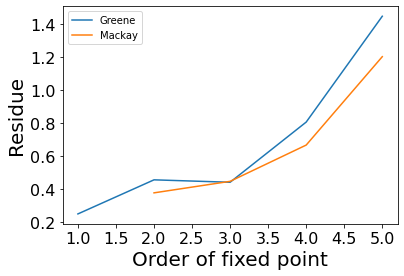

In [5]:
# set up the integrator
iparams = dict()
iparams['rtol'] = 1e-10

pparams = dict()
pparams['Nfp'] = 1
pparams['theta'] = 0

flux_surface = FluxSurface(ps,pparams,integrator_params=iparams)
iota = 1/((np.sqrt(5) + 1) / 2)
fsresult = flux_surface.compute(iota, n_expand=9, fixed_point_left=fp35, fixed_point_right=fp58)
pplot.plot(ylim=[0.58,0.66],s=0.5)
flux_surface.plot()
flux_surface.plot_residue()

## 6. Compute the Lyapunov Exponent

In [6]:
# set up the integrator
iparams = dict()
iparams['rtol'] = 1e-10

pparams = dict()
pparams['Nfp'] = 1
pparams['nPpts'] = 4000

le = LyapunovExponent(ps,pparams,integrator_params=iparams)

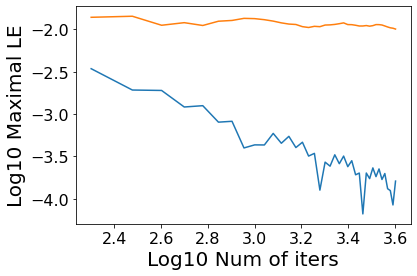

In [7]:
le_result=le.compute(0,[result58.s[0],result58.y[0]])
le.plot()
le_result=le.compute(0,[0.63,0])
le.plot()